# EDA Sleep Health

In [3]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 01. 데이터 수집 및 로드

In [4]:
df = pd.read_csv('../data/Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## 02. 데이터 구조 및 변수 이해

In [5]:
print(df.shape) # 891행 12열
print(df.dtypes)
print()
df.info()

(374, 13)
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non

## 03. 데이터 요약 및 기술통계

In [4]:
df.describe(include='object')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,155
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,73,195,99,78


In [6]:
print(df.value_counts('Person ID'), end='\n\n')
print(df.value_counts('Gender'), end='\n\n')
print(df.value_counts('Age'), end='\n\n')
print(df.value_counts('Occupation'), end='\n\n')
print(df.value_counts('Sleep Duration'), end='\n\n')
print(df.value_counts('Quality of Sleep'), end='\n\n')
print(df.value_counts('Physical Activity Level'), end='\n\n')
print(df.value_counts('Stress Level'), end='\n\n')
print(df.value_counts('BMI Category'), end='\n\n')
print(df.value_counts('Blood Pressure'), end='\n\n')
print(df.value_counts('Heart Rate'), end='\n\n')
print(df.value_counts('Daily Steps'), end='\n\n')
print(df.value_counts('Sleep Disorder'), end='\n\n')

Person ID
1      1
247    1
256    1
255    1
254    1
      ..
123    1
122    1
121    1
120    1
374    1
Name: count, Length: 374, dtype: int64

Gender
Male      189
Female    185
Name: count, dtype: int64

Age
43    34
44    30
37    20
38    20
50    20
31    18
32    17
53    17
59    16
39    15
45    14
33    13
30    13
29    13
35    12
36    12
41    12
49    11
57     9
52     9
42     9
51     8
54     7
58     6
28     5
40     4
48     3
55     2
56     2
34     2
27     1
Name: count, dtype: int64

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

Sleep Duration
7.2    36
6.0    31
7.8    28
6.5    26
6.1    25
7.7    24
6.6    20
7.1    19
8.1    15
8.4    14
7.3    14
8.0    13
8.5    13

## 04. 결측치, 이상치 탐지(혈압, 수면장애 - 무호흡증, 불면증)

In [ ]:
df.isna().sum()

In [ ]:
# df.duplicated('PassengerId').sum()

In [9]:
# df['Age'].plot(kind='box')
# plt.show()

## 05. ✅변수분포 시각화
### 수치형 변수 : Box Plot으로 분포와 이상치 시각화
### 범주형 변수 : Donut Pie Chart로 비율 시각화

In [16]:
# 한국어 처리
import matplotlib
import matplotlib.font_manager as fm

font_path = "C:\\Windows\\Fonts\\malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
matplotlib.rc('font', family=font_name)
plt.rc('axes', unicode_minus=False)

# 컬러맵
from matplotlib import cm

## Box Plot

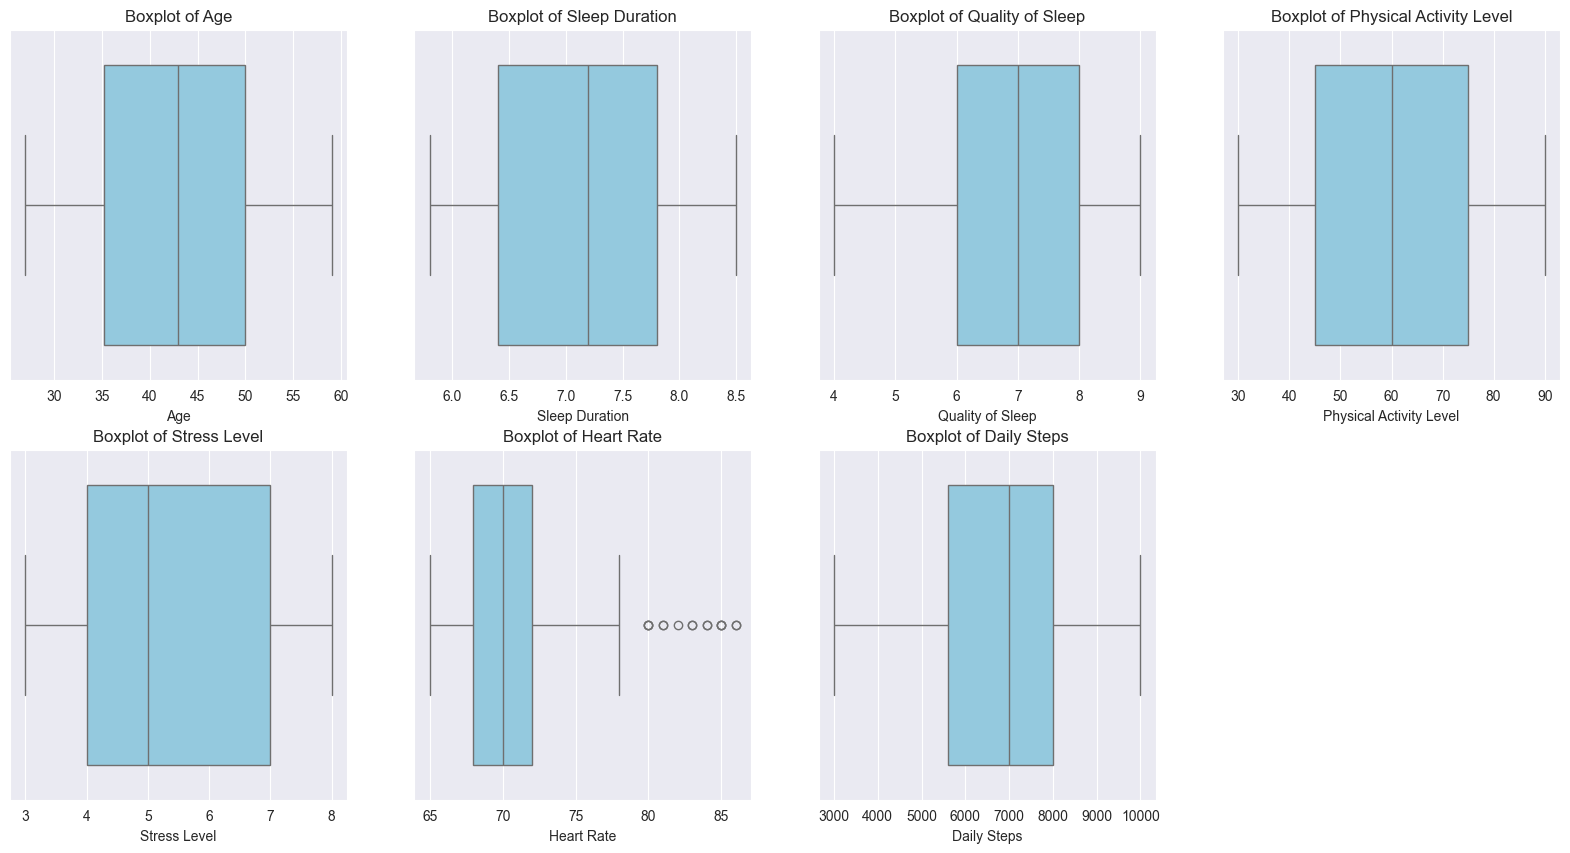

In [11]:
# Person ID drop 했는데, 전처리 했으면 수정 필요!
# 수치형 데이터 분리
num_cols = df.select_dtypes(include='number').columns.drop("Person ID")

fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 4개씩 2줄
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel(col)

 # 사용하지 않는 subplot 제거
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.show()


## Donut Pie Chart

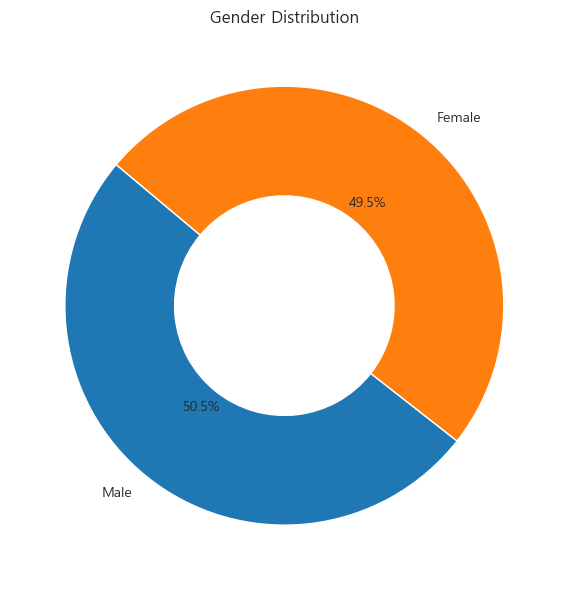

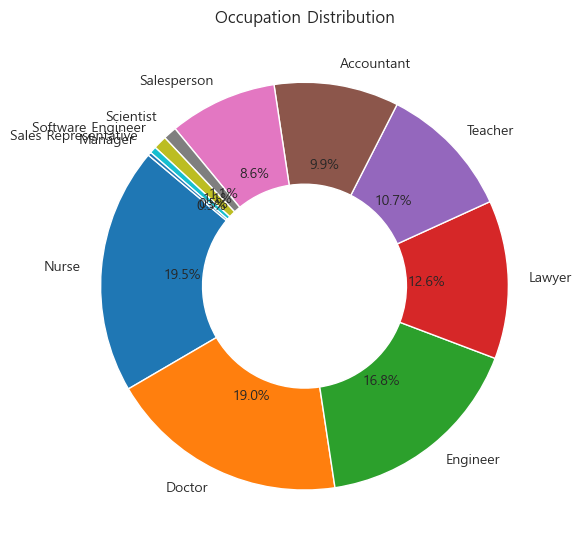

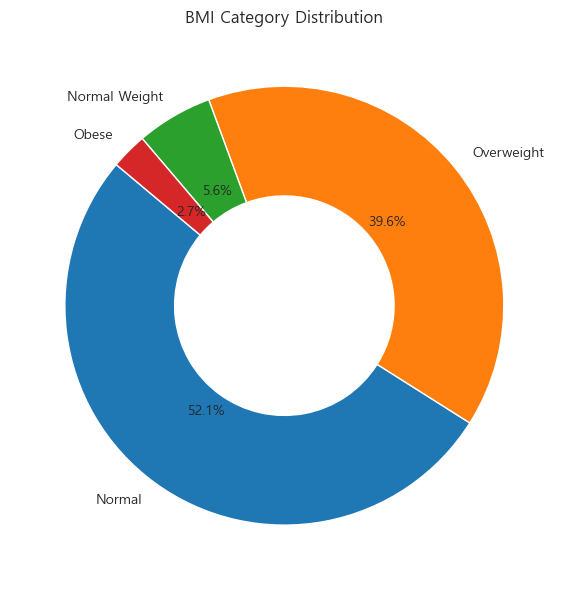

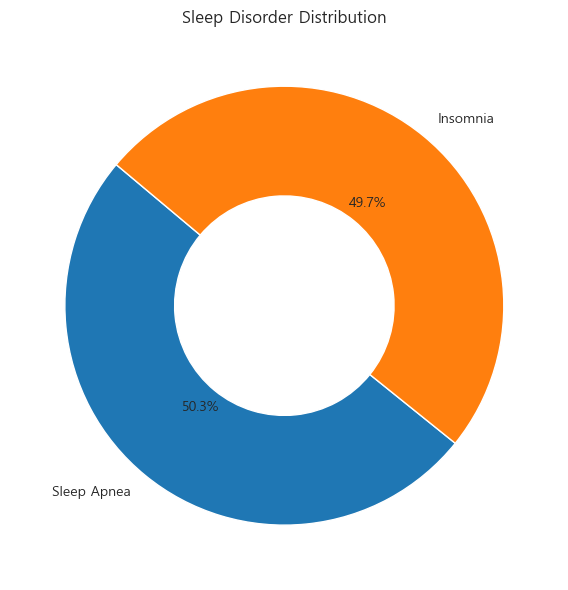

In [21]:
# 범주형 데이터 분리 (Blood Pressure 제외)
cat_cols = df.select_dtypes(include=['object']).columns.drop('Blood Pressure')

for col in cat_cols:
    plt.figure(figsize=(6, 6))
    values = df[col].value_counts()
    plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.5))
    plt.title(f"{col} Distribution")
    plt.gca().set_aspect('equal')
    plt.tight_layout()
    plt.show()

C:\Users\playdata1\AppData\Local\Temp\ipykernel_18484\3422051215.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sleep Disorder', y='Sleep Duration', data=df, palette="Set2")


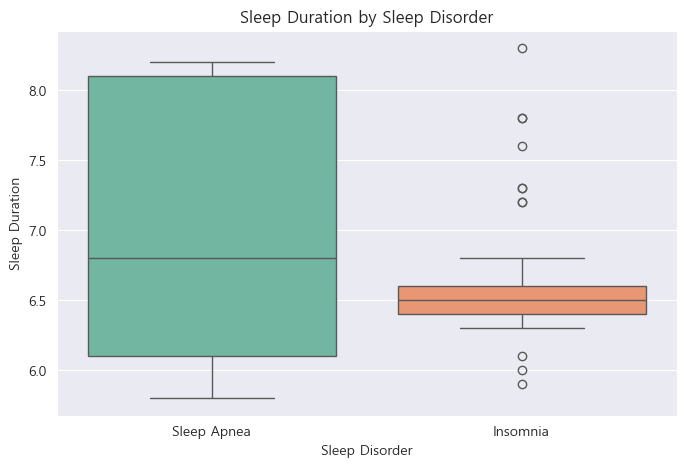

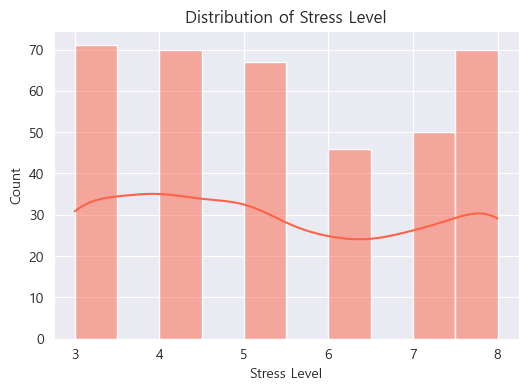

C:\Users\playdata1\AppData\Local\Temp\ipykernel_18484\3422051215.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BMI Category', y='Quality of Sleep', data=df, palette="Set3")


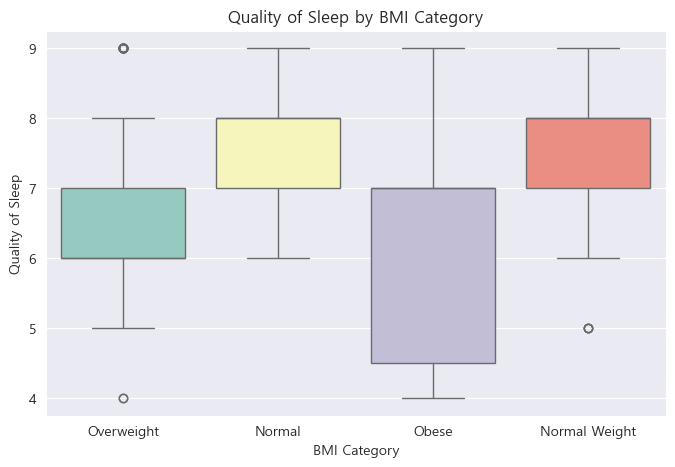

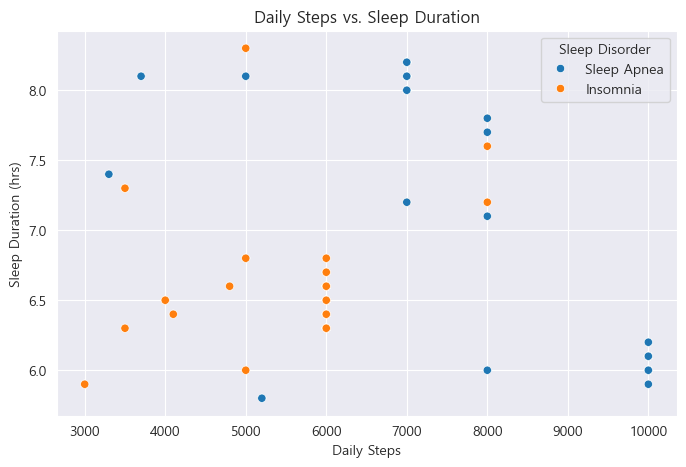

In [22]:
# 3. 심화 시각화 - 유의미한 변수들
# 3-1. Sleep Duration by Sleep Disorder
plt.figure(figsize=(8, 5))
sns.boxplot(x='Sleep Disorder', y='Sleep Duration', data=df, palette="Set2")
plt.title("Sleep Duration by Sleep Disorder")
plt.show()

# 3-2. Stress Level 분포
plt.figure(figsize=(6, 4))
sns.histplot(df['Stress Level'], bins=10, kde=True, color='tomato')
plt.title("Distribution of Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.show()

# 3-3. Quality of Sleep by BMI Category
plt.figure(figsize=(8, 5))
sns.boxplot(x='BMI Category', y='Quality of Sleep', data=df, palette="Set3")
plt.title("Quality of Sleep by BMI Category")
plt.show()

# 3-4. Daily Steps vs. Sleep Duration
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Daily Steps', y='Sleep Duration', hue='Sleep Disorder', data=df)
plt.title("Daily Steps vs. Sleep Duration")
plt.xlabel("Daily Steps")
plt.ylabel("Sleep Duration (hrs)")
plt.show()

### 1) Scatterplot

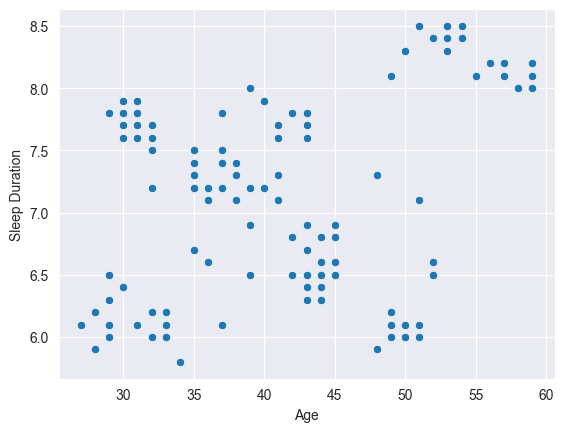

In [5]:
sns.scatterplot(data=df, x='Age', y='Sleep Duration')
plt.show()
# 나이에 따른 수면 시간 확인

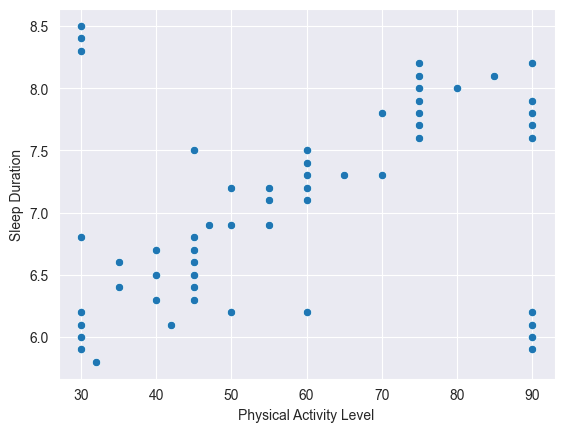

In [6]:
sns.scatterplot(data=df, x='Physical Activity Level', y='Sleep Duration')
plt.show()
# 활동량이 수면 시간과의 상관관계 확인

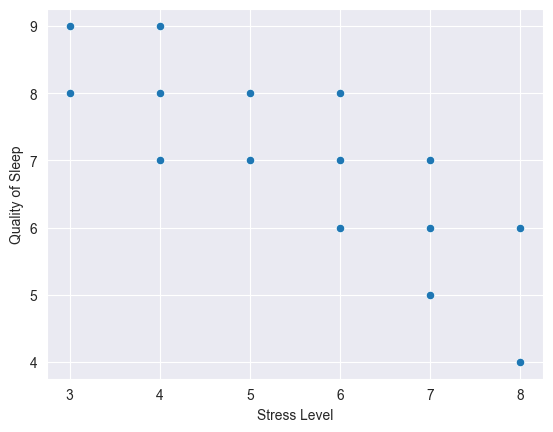

In [7]:
sns.scatterplot(data=df, x='Stress Level', y='Quality of Sleep')
plt.show()
# 스트레스가 수면의 질에 미치는 영향

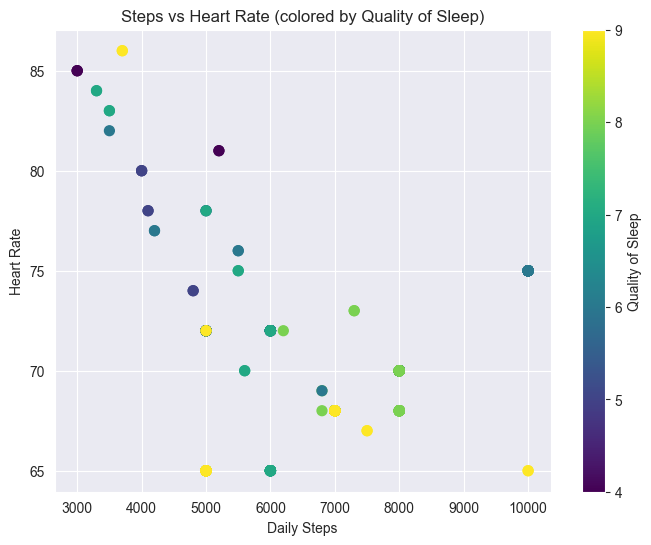

In [8]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(df['Daily Steps'], df['Heart Rate'],
                      c=df['Quality of Sleep'], cmap='viridis', s=50)
plt.colorbar(scatter, label='Quality of Sleep')
plt.xlabel('Daily Steps')
plt.ylabel('Heart Rate')
plt.title('Steps vs Heart Rate (colored by Quality of Sleep)')
plt.show()

# 심장박동과 일일 걸음수가 수면의 질에 끼치는 영향

## 06. 변수간 관계 시각화

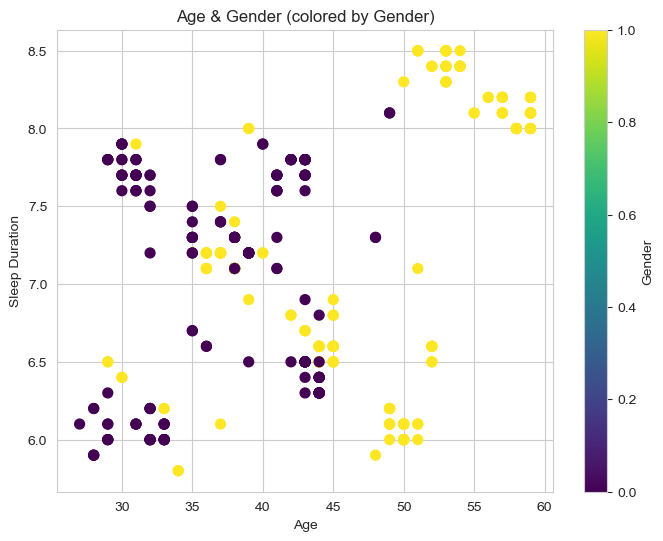

In [14]:
df['Gender_code'] = df['Gender'].map({'Male': 0, 'Female': 1})

plt.figure(figsize=(8,6))
scatter = plt.scatter(df['Age'], df['Sleep Duration'],
                      c=df['Gender_code'], cmap='viridis', s=50)
plt.colorbar(scatter, label='Gender')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.title('Age & Gender (colored by Gender)')
plt.show()
# 나이, 성별에 따른 수면시간 비교

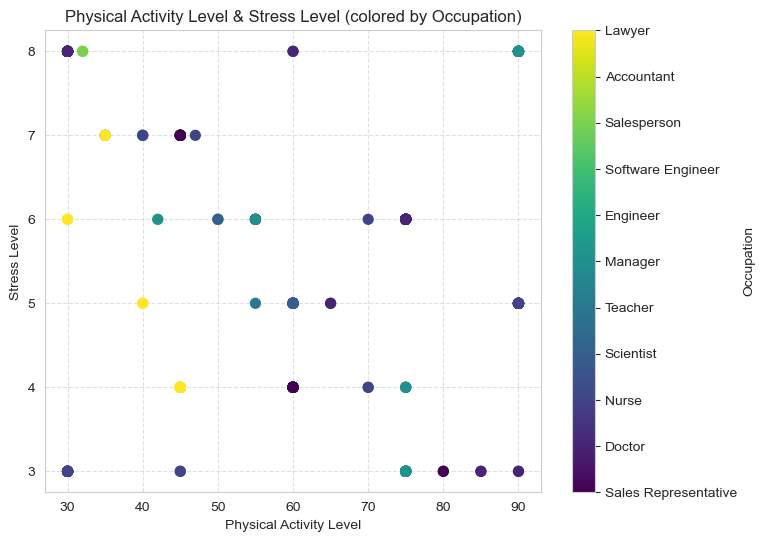

In [15]:
from sklearn.preprocessing import LabelEncoder

# 수치화
le = LabelEncoder()
df['Occupation_encoded'] = le.fit_transform(df['Occupation'])

plt.figure(figsize=(8,6))
scatter = plt.scatter(df['Physical Activity Level'], df['Stress Level'],
                      c=df['Occupation_encoded'], cmap='viridis', s=50)
# 컬러바 추가 및 설정
cbar = plt.colorbar(scatter) # 컬러바 객체를 변수에 할당
cbar.set_label('Occupation') # 컬러바의 전체 레이블 (제목)

# 컬러바의 눈금(ticks)과 레이블(labels)을 원본 직업 이름으로 설정
# 눈금 위치는 0, 1, 2... (인코딩된 숫자)
cbar.set_ticks(df['Occupation_encoded'].unique()) # 인코딩된 고유 숫자들을 눈금 위치로 설정
cbar.set_ticklabels(le.classes_) # 해당 눈금 위치에 원본 직업 이름을 레이블로 설정

plt.xlabel('Physical Activity Level')
plt.ylabel('Stress Level')
plt.title('Physical Activity Level & Stress Level (colored by Occupation)')
plt.grid(True, linestyle='--', alpha=0.6) # 그리드 추가
plt.show()

# 직업에 따른 활동량과 스트레스 관계

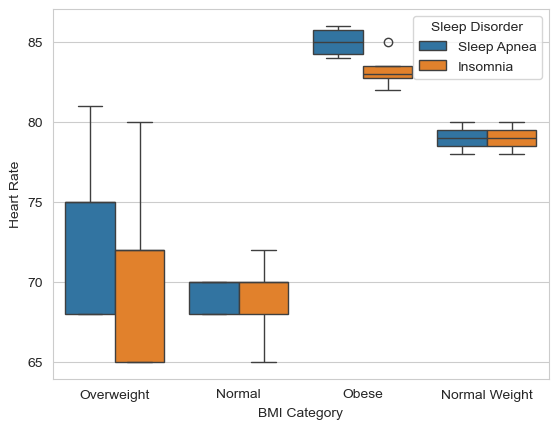

In [16]:
# 박스플롯 그리기
sns.boxplot(data=df, x='BMI Category', y='Heart Rate', hue='Sleep Disorder')
plt.show()
# BMI가 수면장애와 심장박동 수에 미치는 영향

## 07. 상관관계 및 교차분석
- 연속형 데이터 : 상관계수
- 범주형 데이터 : 교차표

In [17]:
corr_mat = df.corr(numeric_only=True)
corr_mat

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_code,Occupation_encoded
Person ID,1.000000,0.990516,0.296305,0.431612,0.149882,-0.394287,-0.225467,0.043844,0.584229,0.269343
Age,0.990516,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973,0.596358,0.231188
Sleep Duration,0.296305,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533,0.121579,-0.325775
Quality of Sleep,0.431612,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791,0.291366,-0.278071
Physical Activity Level,0.149882,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723,-0.001454,-0.103660
Stress Level,-0.394287,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829,-0.396018,0.021123
Heart Rate,-0.225467,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309,-0.217105,0.043928
Daily Steps,0.043844,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000,0.014509,-0.105877
Gender_code,0.584229,0.596358,0.121579,0.291366,-0.001454,-0.396018,-0.217105,0.014509,1.000000,0.219113
Occupation_encoded,0.269343,0.231188,-0.325775,-0.278071,-0.103660,0.021123,0.043928,-0.105877,0.219113,1.000000


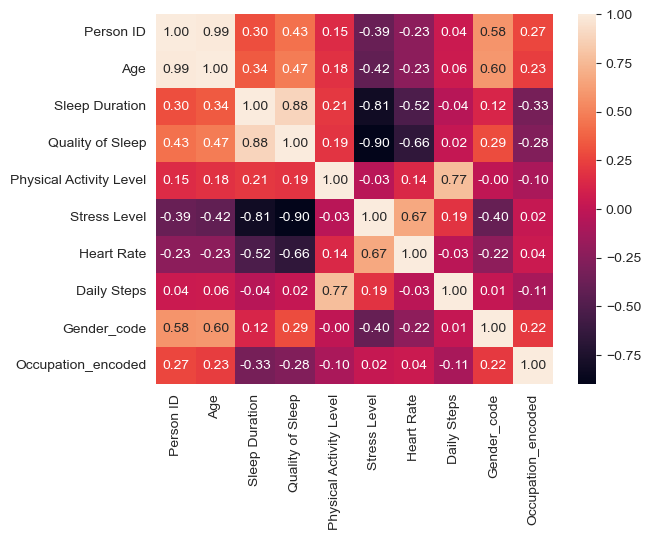

In [18]:
sns.heatmap(corr_mat, annot=True, fmt='.2f')
plt.show()

In [19]:
# 교차표
pd.crosstab(df['Age'], df['Sleep Duration'])

Sleep Duration,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,...,7.6,7.7,7.8,7.9,8.0,8.1,8.2,8.3,8.4,8.5
Age,,,,,,,,,,,,,,,,,,,,,
27,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,3,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,4,2,0,1,0,2,0,0,...,0,0,4,0,0,0,0,0,0,0
30,0,0,0,0,0,0,2,0,0,0,...,1,4,2,4,0,0,0,0,0,0
31,0,0,0,3,0,0,0,0,0,0,...,3,8,3,1,0,0,0,0,0,0
32,0,0,7,0,4,0,0,0,0,0,...,1,2,0,0,0,0,0,0,0,0
33,0,0,7,4,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# 두 변수간 교차분석
pivot_age_pclass = df.pivot_table(index='Age', columns='Gender', values='Sleep Duration')
pivot_disorder_pclass = df.pivot_table(index='Sleep Disorder', columns='Gender', values='Sleep Duration', aggfunc='mean')
display(pivot_age_pclass)
display(pivot_disorder_pclass)

Gender,Female,Male
Age,,
27,NaN,6.100000
28,NaN,6.020000
29,6.500000,6.700000
30,6.400000,7.781818
31,7.900000,7.417647
32,NaN,6.588235
33,6.200000,6.036364
34,5.800000,NaN
35,7.200000,7.218182


Gender,Female,Male
Sleep Disorder,,
Insomnia,6.633333,6.551220
Sleep Apnea,7.035821,7.009091


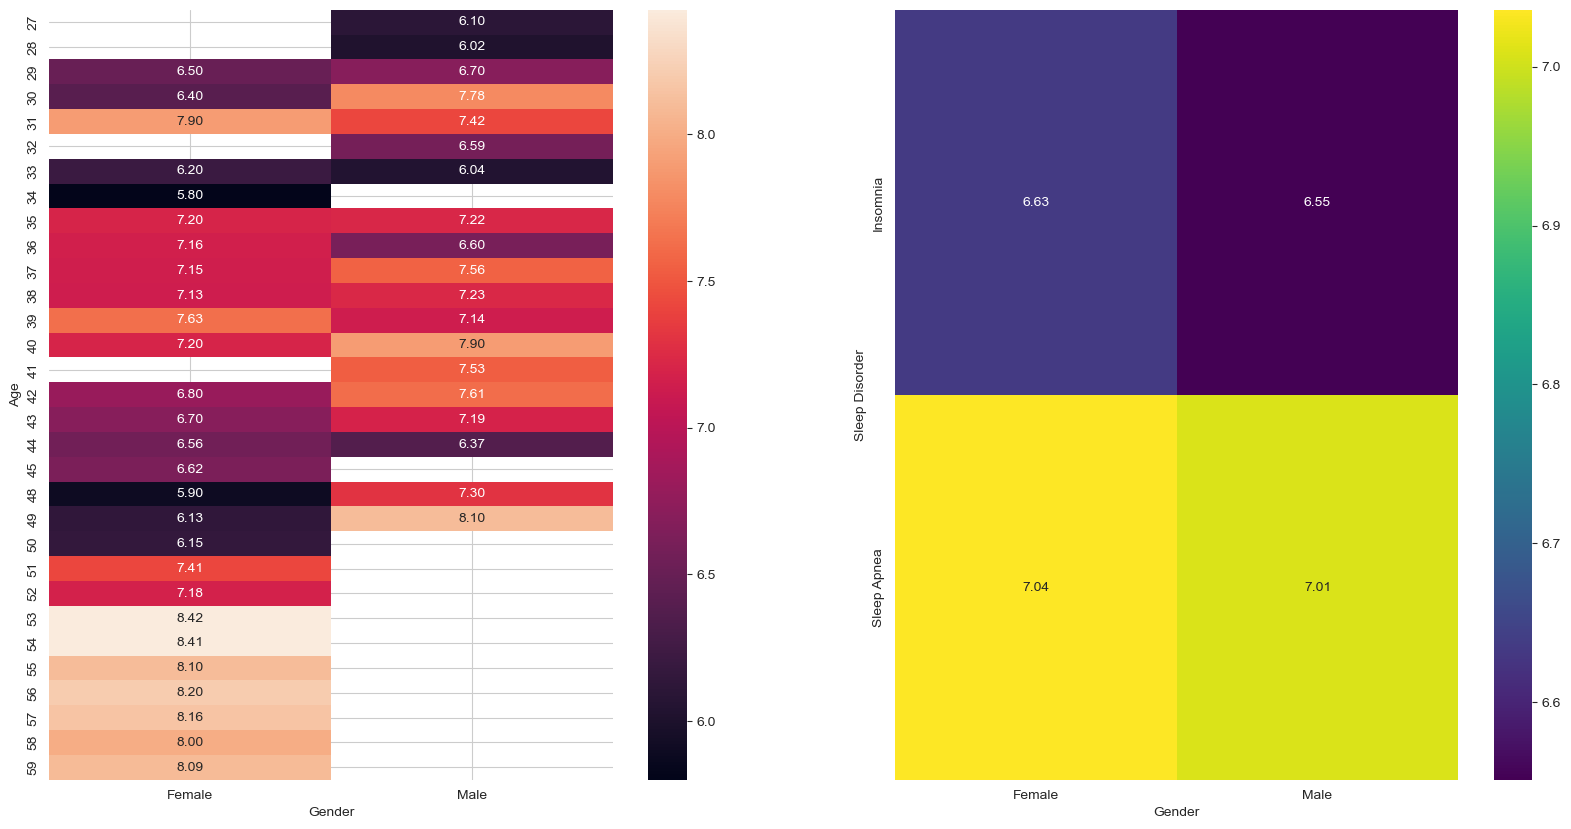

In [21]:
# 히트맵
_, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(pivot_age_pclass, annot=True, fmt='.2f', ax=ax[0])
sns.heatmap(pivot_disorder_pclass, annot=True, fmt='.2f', ax=ax[1], cmap='viridis')
plt.show()

## 08. 데이터전처리
- 결측치/중복값/이상치 처리
- 불필요한 컬럼 제거

## 09. Feature Engineering
Feature(독립변수, 속성, 열) 가공.
- 새로운 변수 생성
- 그룹핑 처리
- 편향개선 (로그함수)
- 스케일링 (범위변경)

## 10. 최종요약/인사이트 도출